In [3]:
import pandas as pd
import numpy as np
import math, copy
import matplotlib.pyplot as plt

# Extrapolatory Data Analysis


In [4]:
df = pd.read_csv("co2.csv")
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


Structure of Data:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

Descriptive Statistics

In [6]:
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


Data Visualization

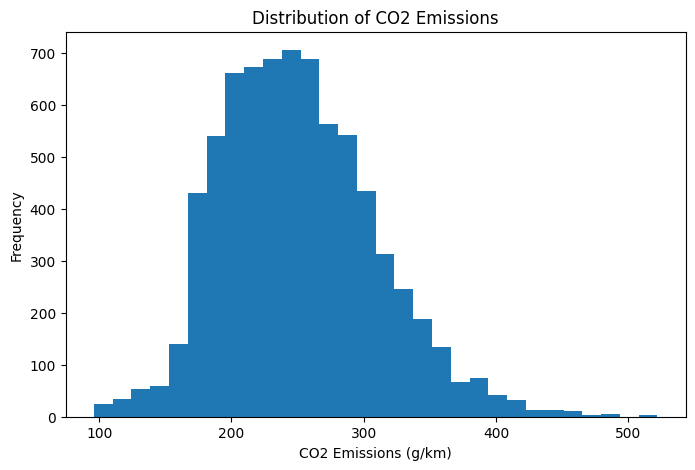

In [7]:
plt.figure(figsize=(8,5))
plt.hist(df['CO2 Emissions(g/km)'], bins=30)
plt.xlabel('CO2 Emissions (g/km)')
plt.ylabel('Frequency')
plt.title('Distribution of CO2 Emissions')
plt.show()

Data Cleaning

In [8]:
df.duplicated().value_counts()

False    6282
True     1103
Name: count, dtype: int64

In [9]:
df_cleaned = df.drop_duplicates()
df_cleaned.duplicated().value_counts()

False    6282
Name: count, dtype: int64

In [10]:
df_cleaned.nunique()

Make                                  42
Model                               2053
Vehicle Class                         16
Engine Size(L)                        51
Cylinders                              8
Transmission                          27
Fuel Type                              5
Fuel Consumption City (L/100 km)     211
Fuel Consumption Hwy (L/100 km)      143
Fuel Consumption Comb (L/100 km)     181
Fuel Consumption Comb (mpg)           54
CO2 Emissions(g/km)                  331
dtype: int64

In [11]:
df_cleaned.isnull().value_counts()

Make   Model  Vehicle Class  Engine Size(L)  Cylinders  Transmission  Fuel Type  Fuel Consumption City (L/100 km)  Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  Fuel Consumption Comb (mpg)  CO2 Emissions(g/km)
False  False  False          False           False      False         False      False                             False                            False                             False                        False                  6282
Name: count, dtype: int64

#### Hence Data is cleaned

# Linear Regression Models

### Univariate Linear Regression


In [12]:
def compute_cost(x, y, w, b):
   
    m = x.shape[0] 
    cost = 0
    
    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i])**2
    total_cost = 1 / (2 * m) * cost

    return total_cost


def compute_gradient(x, y, w, b): 
    m = x.shape[0]    
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):  
        f_wb = w * x[i] + b 
        dj_dw_i = (f_wb - y[i]) * x[i] 
        dj_db_i = f_wb - y[i] 
        dj_db += dj_db_i
        dj_dw += dj_dw_i 
    dj_dw = dj_dw / m 
    dj_db = dj_db / m 
        
    return dj_dw, dj_db


def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function): 
    
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    
    for i in range(num_iters):

        dj_dw, dj_db = gradient_function(x, y, w , b)     

        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            

        if i<100000: #resource protection
            J_history.append( cost_function(x, y, w , b))
            p_history.append([w,b])

    return w, b, J_history, p_history 
    
    

In [168]:
#taking fuel_consumption as input X
emissions = np.array(df_cleaned["CO2 Emissions(g/km)"])
fuel_consumption = np.array(df_cleaned["Fuel Consumption City (L/100 km)"])

In [169]:
w_init = 0
b_init = 0

iterations = 10000
tmp_alpha = 0.01

w_final, b_final, J_hist, p_hist = gradient_descent(fuel_consumption ,emissions, w_init, b_init, tmp_alpha, iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final},{b_final})")



(w,b) found by gradient descent: (15.334139739914228,57.7881423789637)


In [170]:
def linear_regression_model(w,b,x):
    return(w*x+b)

x = float(input("Enter fuel consumption on in city (L/100km): "))

print(f"Fuel Consumption: {x}, CO2 Emissions in g/km: {linear_regression_model(w_final, b_final, x)}")

Fuel Consumption: 5.6, CO2 Emissions in g/km: 143.65932492248336


In [171]:
#with engine size as input X
w_init = 0
b_init = 0

iterations = 10000
tmp_alpha = 0.01

engine_size = np.array(df_cleaned["Engine Size(L)"])

w_final, b_final, J_hist, p_hist = gradient_descent(engine_size ,emissions, w_init, b_init, tmp_alpha, iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final},{b_final})")

x = float(input("Enter engine size in L: "))
print(f"Engine size: {x}, CO2 emissions in g/km: {w_final*x + b_final}")


(w,b) found by gradient descent: (37.12387809068215,133.77903949794126)
Engine size: 5.0, CO2 emissions in g/km: 319.398429951352


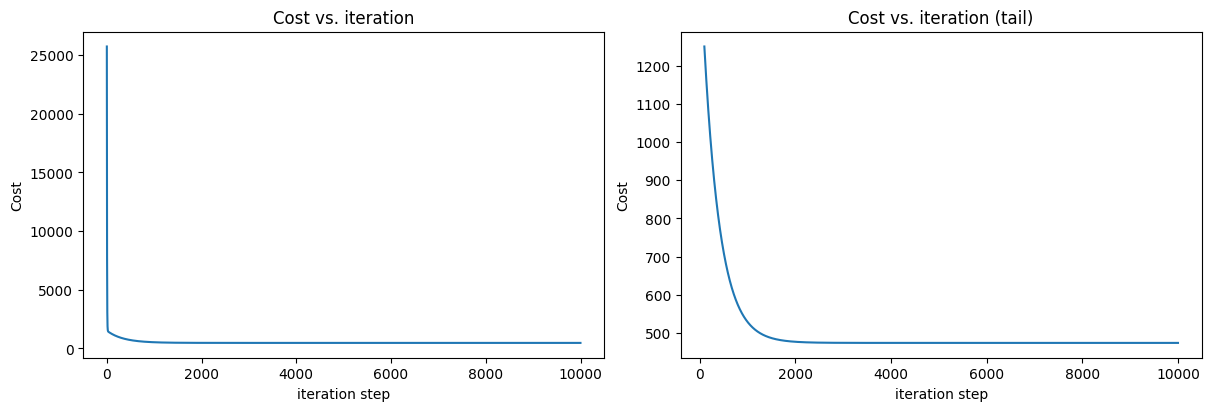

In [172]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()

### Multiple Linear Regression

In [161]:
def mcompute_cost(X, y, w, b): 


    m = X.shape[0]
    cost = 0.0
    for i in range(m):                                
        f_wb_i = np.dot(X[i], w) + b           
        cost = cost + (f_wb_i - y[i])**2       
    cost = cost / (2 * m)                         
    return cost

def mcompute_gradient(X, y, w, b): 

    m,n = X.shape           
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):                             
        err = (np.dot(X[i], w) + b) - y[i]   
        for j in range(n):                         
            dj_dw[j] = dj_dw[j] + err * X[i, j]    
        dj_db = dj_db + err                        
    dj_dw = dj_dw / m                                
    dj_db = dj_db / m                                
        
    return dj_db, dj_dw

def mgradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):

        dj_db,dj_dw = gradient_function(X, y, w, b)

        w = w - alpha * dj_dw               
        b = b - alpha * dj_db  
        
      
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(X, y, w, b))

    return w, b, J_history

In [122]:
# taking only numerical parameters as input X
# not taking Fuel consumption combined (mpg) as its same thing
X_df = df_cleaned[["Engine Size(L)", "Cylinders", "Fuel Consumption City (L/100 km)", "Fuel Consumption Hwy (L/100 km)", "Fuel Consumption Comb (L/100 km)"]]
X_df

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km)
0,2.0,4,9.9,6.7,8.5
1,2.4,4,11.2,7.7,9.6
2,1.5,4,6.0,5.8,5.9
3,3.5,6,12.7,9.1,11.1
4,3.5,6,12.1,8.7,10.6
...,...,...,...,...,...
7380,2.0,4,10.7,7.7,9.4
7381,2.0,4,11.2,8.3,9.9
7382,2.0,4,11.7,8.6,10.3
7383,2.0,4,11.2,8.3,9.9


In [156]:
X_mtrain = X_df.to_numpy()
y_mtrain = np.array(df_cleaned["CO2 Emissions(g/km)"])

X_mtrain

array([[ 2. ,  4. ,  9.9,  6.7,  8.5],
       [ 2.4,  4. , 11.2,  7.7,  9.6],
       [ 1.5,  4. ,  6. ,  5.8,  5.9],
       ...,
       [ 2. ,  4. , 11.7,  8.6, 10.3],
       [ 2. ,  4. , 11.2,  8.3,  9.9],
       [ 2. ,  4. , 12.2,  8.7, 10.7]], shape=(6282, 5))

In [162]:
m,n = X_mtrain.shape
minitial_w = np.zeros((n))
minitial_b = 0.

miterations = 10000
malpha = 5.0e-4

w_mfinal, b_mfinal, J_mhist = mgradient_descent(X_mtrain, y_mtrain, minitial_w, minitial_b, mcompute_cost, mcompute_gradient, malpha, miterations)
print(f"b,w found by gradient descent: {b_mfinal},{w_mfinal} ")


b,w found by gradient descent: 12.45428664068453,[-1.38685952 11.51970138  2.84185453  8.77435837  5.5508875 ] 


In [166]:
def mlinear_regression_model(w,b,x):
    return(np.dot(w,x)+b)

mx = input("Enter Engine Size(L), Cylinders, Fuel Consumption City (L/100 km), Fuel Consumption Hwy (L/100 km), Fuel Consumption Comb (L/100 km) seperated by spaces: ")
print(mx.split(" "))
mx_nparray = np.array(mx.split(), dtype=float)

print(f"CO2 Emissions in g/km: {np.dot(w_mfinal,mx_nparray)+b_mfinal}")

['2', '4', '9.9', '6.7', '8.5']
CO2 Emissions in g/km: 189.86447785899583


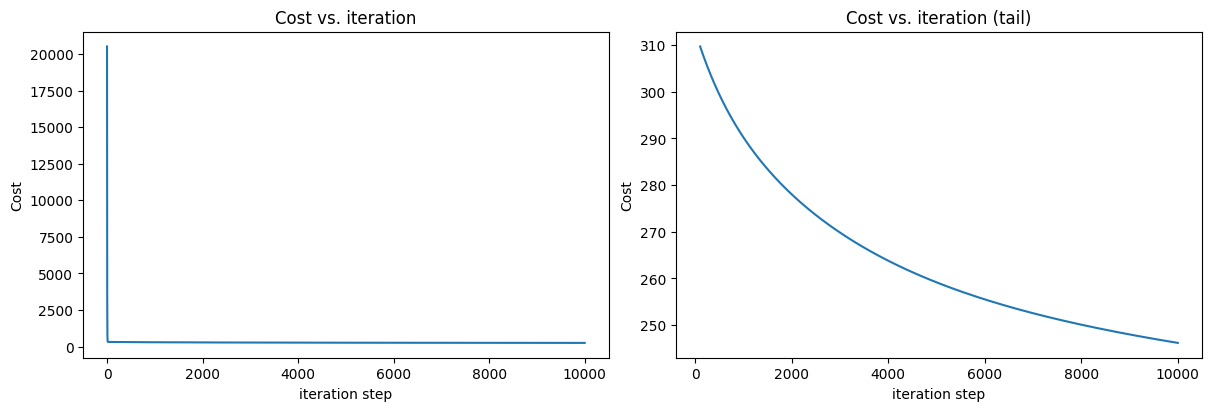

In [165]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_mhist)
ax2.plot(100 + np.arange(len(J_mhist[100:])), J_mhist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()